In [19]:
import os
import cv2
import numpy as np
import random
from IPython.display import display, clear_output, HTML
import ipywidgets as widgets
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path


In [20]:
from generate_bottle_module import BottleGroup, ImageComposer
from my_timer import Timer

In [21]:
class BottleGenerator:
    def __init__(self):
        self.CANVAS_WIDTH = 1920
        self.CANVAS_HEIGHT = 1100
        self.BOTTLE_WIDTH = 288
        self.BOTTLE_HEIGHT = 665
        self.GREEN_BG = (210, 210, 210, 255)
        #self.image_dir = "Create_bottles\Images"
        self.image_dir = Path("Images")
        
        # Проверяем директорию с изображениями
        if not os.path.exists(self.image_dir):
            os.makedirs(self.image_dir)
            print(f"Создана папка {self.image_dir}. Добавьте изображения компонентов бутылки.")
        else:
            print(f"Папка {self.image_dir} существует")
    
        # Создаем холст конвейера
        self.conveyor = np.zeros((self.CANVAS_HEIGHT, self.CANVAS_WIDTH, 4), dtype=np.uint8)
        self.conveyor[:] = self.GREEN_BG
        
        # Параметры по умолчанию
        self.params = {
            'fill_level': 0.82,
            'fill_level_delta': 0.05,
            'cap_visible': True,
            'ring_visible': True,
            'label_visible': True,
            'label_offset': 0,
            'label_angle': 0,
            'label_vertical_offset': 0,
            'bottle_spacing': 160,
            'n_bottles': 4,
            'cap_position_delta': 10,  # Максимальное смещение крышки в пикселях
            'ring_position_delta': 10   # Максимальное смещение кольца в пикселях
        }
        
        # Конфигурация частей бутылки
        self.bottle_config = {
            "bottle": {
                "file": "bottle3.png",
                "position": (0, 90),
                "angle": 0,
                "scale": 1.0,
                "visible": True,
                "offset": 0,
                "filler_enable": True,
                "filler_level": 0.7,
                "filler_color": (100, 200, 200, 180),
            },
            "cap": {
                "file": "cap2.png",
                "position": (51, 122),
                "angle": 0,
                "scale": 1.0,
                "visible": True,
                "offset": 0
            },
            "ring": {
                "file": "ring2.png",
                "position": (51, 155),
                "angle": 0,
                "scale": 1.0,
                "visible": True,
                "offset": 0
            },
            "label": {
                "file": "eticet2.png",
                "position": (0, 490),
                "angle": 0,
                "scale": 1.0,
                "visible": True, 
                "offset": 0
            }
        }
    
    def generate_image(self):
        """Генерирует изображение с текущими параметрами"""
        composer = ImageComposer(self.CANVAS_WIDTH, self.CANVAS_HEIGHT, (0, 0, 0, 0))
        composer.add_layer(self.conveyor, (0, 0))
        
        start_x = 100
        current_x = start_x
        
        for i in range(self.params['n_bottles']):
            config = {k: v.copy() for k, v in self.bottle_config.items()}
            
            # Уровень наполнения
            config['bottle']['filler_level'] = max(0, min(1, 
                self.params['fill_level'] + 
                random.uniform(-self.params['fill_level_delta'], self.params['fill_level_delta'])
            ))
            
            config['cap']['visible'] = self.params['cap_visible'] and (random.random() > 0.1)

            cap_base_x, cap_base_y = config['cap']['position']
            #cap_offset_x = random.uniform(-self.params['cap_position_delta'], self.params['cap_position_delta'])
            cap_offset_x = 0
            cap_offset_y = random.uniform(-self.params['cap_position_delta'], self.params['cap_position_delta'])
            new_cap_y = cap_base_y + cap_offset_y

            config['cap']['position'] = (cap_base_x + cap_offset_x, new_cap_y)

            config['cap']['angle'] = random.uniform(-3, 3)


            config['ring']['visible'] = self.params['ring_visible'] and (random.random() > 0.1)
            ring_base_x, ring_base_y = config['ring']['position']
            #ring_offset_x = random.uniform(-self.params['ring_position_delta'], self.params['ring_position_delta'])

            ring_offset_x = 0
            ring_offset_y = random.uniform(-self.params['ring_position_delta'], self.params['ring_position_delta'])
            config['ring']['position'] = (ring_base_x + ring_offset_x, ring_base_y + ring_offset_y)

            config['ring']['angle'] = random.uniform(-3, 3)
            
            # Параметры этикетки
            config['label']['visible'] = self.params['label_visible']
            if self.params['label_visible']:
                config['label']['offset'] = self.params['label_offset']
                config['label']['angle'] = self.params['label_angle']
                base_pos = config['label']['position']
                config['label']['position'] = (base_pos[0], base_pos[1] + self.params['label_vertical_offset'])
            
            # Создаем бутылку
            bottle = BottleGroup(self.image_dir, config, position=(80+current_x, 0))
            
            # Добавляем слои
            for img, pos in bottle.get_layers():
                composer.add_layer(img, pos)
            
            current_x += self.BOTTLE_WIDTH + self.params['bottle_spacing']

        return composer.compose()

In [22]:
print("Полный путь к папке:", (Path("Images").absolute()))

Полный путь к папке: c:\Users\INNOTECH\Desktop\Inspector_bottles\Create_bottles\Images


In [23]:
# Создаем генератор (глобальная переменная для доступа из других ячеек)
generator = BottleGenerator()

Папка Images существует


In [24]:
# Добавляем CSS стили для всех виджетов
display(HTML("""
<style>
    /* Общий стиль для всех виджетов */
    .widget-box {
        background-color: #202020 !important;
        padding: 12px !important;
        border-radius: 6px !important;
        margin-bottom: 15px !important;
    }
    
    /* Стиль текста (работает для всех виджетов) */
    .widget-label, 
    .widget-readout,
    .widget-checkbox label,
    .widget-toggle-button label,
    .widget-button,
    .widget-dropdown > select,
    .widget-select > select,
    .widget-text input,
    .widget-textarea textarea {
        color: #ffffff !important;
        font-size: 14px !important;
    }
    
    /* Стиль слайдеров */
    .widget-slider .ui-slider {
        background: #333333 !important;
    }
    .widget-slider .ui-slider-range {
        background: #555555 !important;
    }
    .widget-slider .ui-slider-handle {
        background: #ffffff !important;
        border: 2px solid #ffffff !important;
        width: 16px !important;
        height: 16px !important;
        margin-top: -7px !important;
    }
    
    /* Стиль чекбоксов */
    .widget-checkbox input[type="checkbox"] {
        filter: invert(1) hue-rotate(180deg) brightness(1.5);
        margin-right: 8px;
    }
    
    /* Стиль кнопок */
    .widget-button {
        background-color: #444444 !important;
        border: 1px solid #666666 !important;
    }
    .widget-button:hover {
        background-color: #555555 !important;
    }
    
    /* Стиль выпадающих списков */
    .widget-dropdown > select,
    .widget-select > select {
        background-color: #333333 !important;
        border: 1px solid #555555 !important;
    }
    
    /* Стиль текстовых полей */
    .widget-text input,
    .widget-textarea textarea {
        background-color: #333333 !important;
        border: 1px solid #555555 !important;
    }
</style>
"""))

# Настройки стиля и layout
style = {
    'description_width': '250px',
    'handle_color': 'white',
    'text_color': 'white'
}

layout = widgets.Layout(
    width='800px',
    margin='0 0 20px 0',
    padding='10px'
)


# Создаем элементы управления
controls = {
    'fill_level': widgets.FloatSlider(
        value=generator.params['fill_level'], 
        min=0, max=1.0, step=0.01, 
        description='Уровень наполнения:',
        style=style,
        layout=layout
    ),
    'fill_level_delta': widgets.FloatSlider(
        value=generator.params['fill_level_delta'], 
        min=0, max=0.3, step=0.01, 
        description='Вариативность наполнения:',
        style=style,
        layout=layout
    ),
    'cap_visible': widgets.Checkbox(
        value=generator.params['cap_visible'], 
        description='Крышка видима',
        style=style,
        layout=layout
    ),
    'ring_visible': widgets.Checkbox(
        value=generator.params['ring_visible'], 
        description='Кольцо видимо',
        style=style,
        layout=layout
    ),
    'label_visible': widgets.Checkbox(
        value=generator.params['label_visible'], 
        description='Этикетка видима',
        style=style,
        layout=layout
    ),
    'label_offset': widgets.IntSlider(
        value=generator.params['label_offset'], 
        min=0, max=50, 
        description='Смещение этикетки:',
        style=style,
        layout=layout
    ),
    'label_angle': widgets.IntSlider(
        value=generator.params['label_angle'], 
        min=-30, max=30, 
        description='Угол поворота этикетки:',
        style=style,
        layout=layout
    ),
    'label_vertical_offset': widgets.IntSlider(
        value=generator.params['label_vertical_offset'], 
        min=-40, max=40, 
        description='Вертикальное смещение этикетки:',
        style=style,
        layout=layout
    ),
    'bottle_spacing': widgets.IntSlider(
        value=generator.params['bottle_spacing'], 
        min=50, max=300, 
        description='Расстояние между бутылками:',
        style=style,
        layout=layout
    ),
    'n_bottles': widgets.IntSlider(
        value=generator.params['n_bottles'], 
        min=1, max=10, 
        description='Количество бутылок:',
        style=style,
        layout=layout
    )
}

# Кнопка для применения параметров
apply_btn = widgets.Button(
    description="Применить параметры", 
    button_style='primary',
    icon='check'
)

# Функция для применения параметров
def apply_parameters(b):
    # Обновляем параметры в генераторе
    generator.params = {
        'fill_level': controls['fill_level'].value,
        'fill_level_delta': controls['fill_level_delta'].value,
        'cap_visible': controls['cap_visible'].value,
        'ring_visible': controls['ring_visible'].value,
        'label_visible': controls['label_visible'].value,
        'label_offset': controls['label_offset'].value,
        'label_angle': controls['label_angle'].value,
        'label_vertical_offset': controls['label_vertical_offset'].value,
        'bottle_spacing': controls['bottle_spacing'].value,
        'n_bottles': controls['n_bottles'].value
    }
    print("Параметры успешно применены!")

# Привязываем функцию к кнопке
apply_btn.on_click(apply_parameters)

# Отображаем элементы управления
display(widgets.VBox([
    widgets.Label(value="🎚️ Настройте параметры генерации:"),
    controls['fill_level'],
    controls['fill_level_delta'],
    controls['n_bottles'],
    controls['bottle_spacing'],
    widgets.HBox([controls['cap_visible'], controls['ring_visible'], controls['label_visible']]),
    controls['label_offset'],
    controls['label_angle'],
    controls['label_vertical_offset'],
    apply_btn
]))

In [25]:
# Генерируем изображение с текущими параметрами
frame = generator.generate_image()

Text(0.5, 1.0, 'RGB Image')

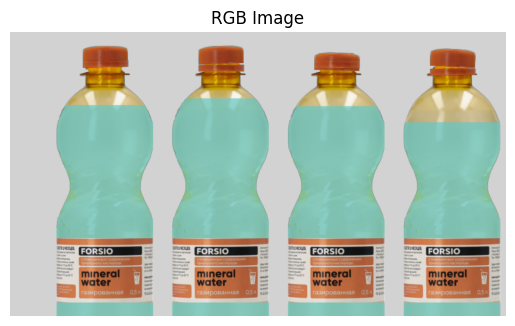

In [26]:
# Первое изображение (цветное)
plt.subplot(1, 1, 1)  # 1 строка, 1 столбца, 1 позиция
plt.imshow(frame)
plt.axis('off')
plt.title('RGB Image')

Таймер timer 2.005338668823242 мс
list_position [(366, 184), (815, 184), (1262, 197), (1711, 189)]


Text(0.5, 1.0, 'image_crop_cap2')

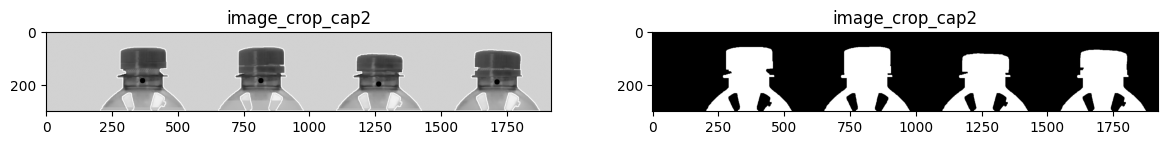

In [27]:
import cv2
import numpy as np

cv2.imwrite('image.jpg', frame)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGRA2RGBA)
frame_gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)

frame_gray_copy = frame_gray.copy()
image_frame = frame_gray_copy[:300,:]
# image_frame = image_resize.copy()

my_timer = Timer('timer')
my_timer.start()


list_position = []

# Улучшенная бинаризация с адаптивным порогом
# thresh = cv2.adaptiveThreshold(image_crop_cap2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#                               cv2.THRESH_BINARY_INV, 51, 2)

_, thresh = cv2.threshold(image_frame, 190, 255, cv2.THRESH_BINARY_INV)

# Морфологические операции для удаления шума
kernel = np.ones((5,5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Поиск контуров
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Фильтрация контуров по площади (игнорируем мелкие шумы)
min_area = 1000  # Минимальная площадь контура
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

for main_contour in filtered_contours:
    M = cv2.moments(main_contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        position = (cX, cY)
        list_position.append(position)

        # Отмечаем центр основного объекта
        cv2.circle(image_frame, position, 10, (0, 255, 0), -1)

        cv2.drawContours(image_frame, [main_contour], -1, (255, 0, 0), 2)

list_position.sort(key=lambda x:x[0])

my_timer.elapsed_time(print_log=True)

print('list_position', list_position)

plt.figure(figsize=(30, 10))

plt.subplot(241)
plt.imshow(image_frame, cmap='gray')
plt.title("image_crop_cap2")

plt.subplot(242)
plt.imshow(thresh, cmap='gray')
plt.title("image_crop_cap2")

Таймер timer 0.9968280792236328 мс


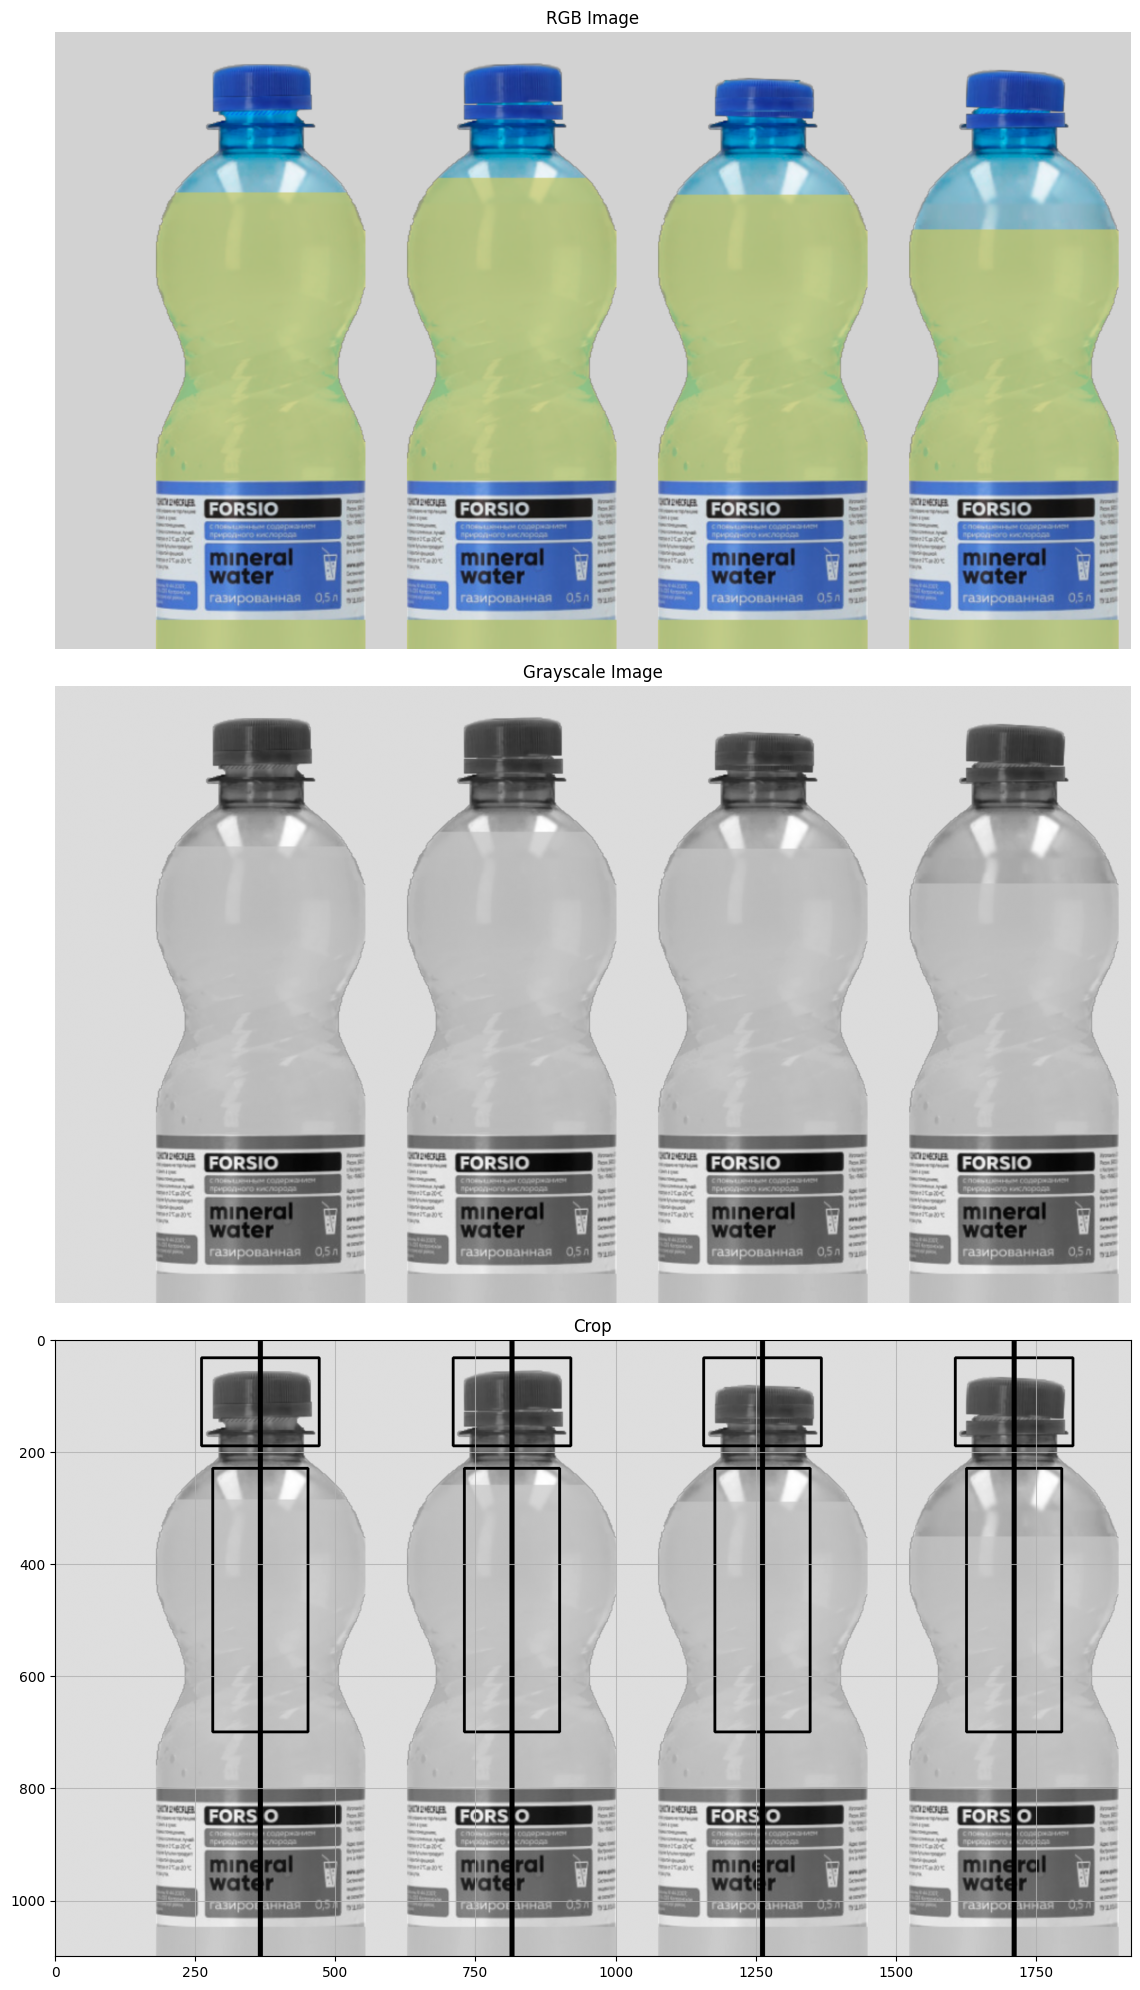

In [28]:

my_timer = Timer('timer')
my_timer.start()

cap_crop = [(160, 33), (370, 190)]
level_crop = [(180, 230), (350, 700)]
 
image_with_rect = frame_gray.copy() 

list_crop = []

for pos in list_position:
    x, y = pos
    
    delta_x = abs(cap_crop[0][0] - cap_crop[1][0])
    cap_x1 = x - delta_x // 2
    cap_x2 = x + delta_x // 2
    cap_y1 = cap_crop[0][1]
    cap_y2 = cap_crop[1][1]

    # # Координаты прямоугольника (верхний левый и нижний правый углы)
    # cap_x1, cap_y1 = 160, 33 # верхний левый угол
    # cap_x2, cap_y2 = 370, 190  # нижний правый угол

    cv2.line(image_with_rect, (x, 0), (x, image_with_rect.shape[1]), color=(0, 255, 255), thickness=7)

    cv2.rectangle(image_with_rect, (cap_x1, cap_y1), (cap_x2, cap_y2), color=(0, 255, 255), thickness=3)

    image_crop_cap = frame_gray[cap_y1:cap_y2, cap_x1:cap_x2]

    delta_x = abs(level_crop[0][0] - level_crop[1][0])

    level_x1 = x - delta_x // 2
    level_x2 = x + delta_x // 2
    level_y1 = level_crop[0][1]
    level_y2 = level_crop[1][1]

    # # Координаты прямоугольника (верхний левый и нижний правый углы)
    # level_x1, level_y1 = 180, 230  # верхний левый угол
    # level_x2, level_y2 = 350, 700  # нижний правый угол

    cv2.rectangle(image_with_rect, (level_x1, level_y1), (level_x2, level_y2), color=(0, 0, 255), thickness=3)

    image_crop_level = frame_gray[level_y1:level_y2, level_x1:level_x2]

    bottle_crop = {}
    bottle_crop['cap'] = image_crop_cap
    bottle_crop['cap_pos'] = (cap_x1, cap_y1)
    bottle_crop['level'] = image_crop_level
    bottle_crop['level_pos'] = (level_x1, level_y1)

    list_crop.append(bottle_crop)



my_timer.elapsed_time(print_log=True)


# Создаем фигуру с двумя подграфиками в одной строке
plt.figure(figsize=(12, 20))  # Общий размер фигуры

# Первое изображение (цветное)
plt.subplot(3, 1, 1)  # 1 строка, 2 столбца, 1 позиция
plt.imshow(frame_rgb)
plt.axis('off')
plt.title('RGB Image')

# Второе изображение (оттенки серого)
plt.subplot(3, 1, 2)  # 1 строка, 2 столбца, 2 позиция
plt.imshow(frame_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

# Третье изображение 
plt.subplot(3, 1, 3) 
plt.imshow(image_with_rect, cmap='gray')
plt.grid(True, alpha=0.8)
#plt.axis('off')
plt.title('Crop')

# plt.subplot(2, 4, 5) 
# plt.imshow(image_crop_level, cmap='gray')
# plt.axis('off')
# plt.title('Level')

# plt.subplot(2, 4, 6) 
# plt.imshow(image_crop_cap, cmap='gray')
# plt.axis('off')
# plt.title('Cap')

# Показываем оба изображения вместе
plt.tight_layout()  # Автоматическая регулировка промежутков
plt.show()

In [29]:
def detect_horizontal_lines(image_bw, 
                           canny_threshold1=30, 
                           canny_threshold2=90,
                           hough_threshold=50,
                           theta=np.pi/180,
                           min_line_length=50,
                           max_line_gap=20,
                           angle_tolerance=5,
                           morph_size=10):
    """
    Обнаруживает горизонтальные линии на черно-белом изображении
    
    Параметры:
        debug: если True, показывает промежуточные этапы обработки
    """

    all_image = {}
    
    # 3. Детектирование границ
    edges = cv2.Canny(image_bw, canny_threshold1, canny_threshold2)

    all_image['edges'] = edges
    
    if morph_size > 0:
        # 4. Морфологические операции для усиления линий
        kernel_horizontal = np.ones((1, morph_size), np.uint8)
        enhanced = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel_horizontal)
    else:
        enhanced = edges
    
    all_image['enhanced'] = enhanced
    
    # 5. Применяем преобразование Хафа
    lines = cv2.HoughLinesP(
        enhanced,
        rho=1,
        theta=theta,
        threshold=hough_threshold,
        minLineLength=min_line_length,
        maxLineGap=max_line_gap
    )
    
    horizontal_lines = []
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
            
            # Фильтр горизонтальных линий (0° и 180° ± допуск)
            if (abs(angle) < angle_tolerance) or (abs(angle) > 180 - angle_tolerance):
                horizontal_lines.append((x1, y1, x2, y2))
    
    return horizontal_lines, all_image

Таймер timer 2.0058155059814453 мс


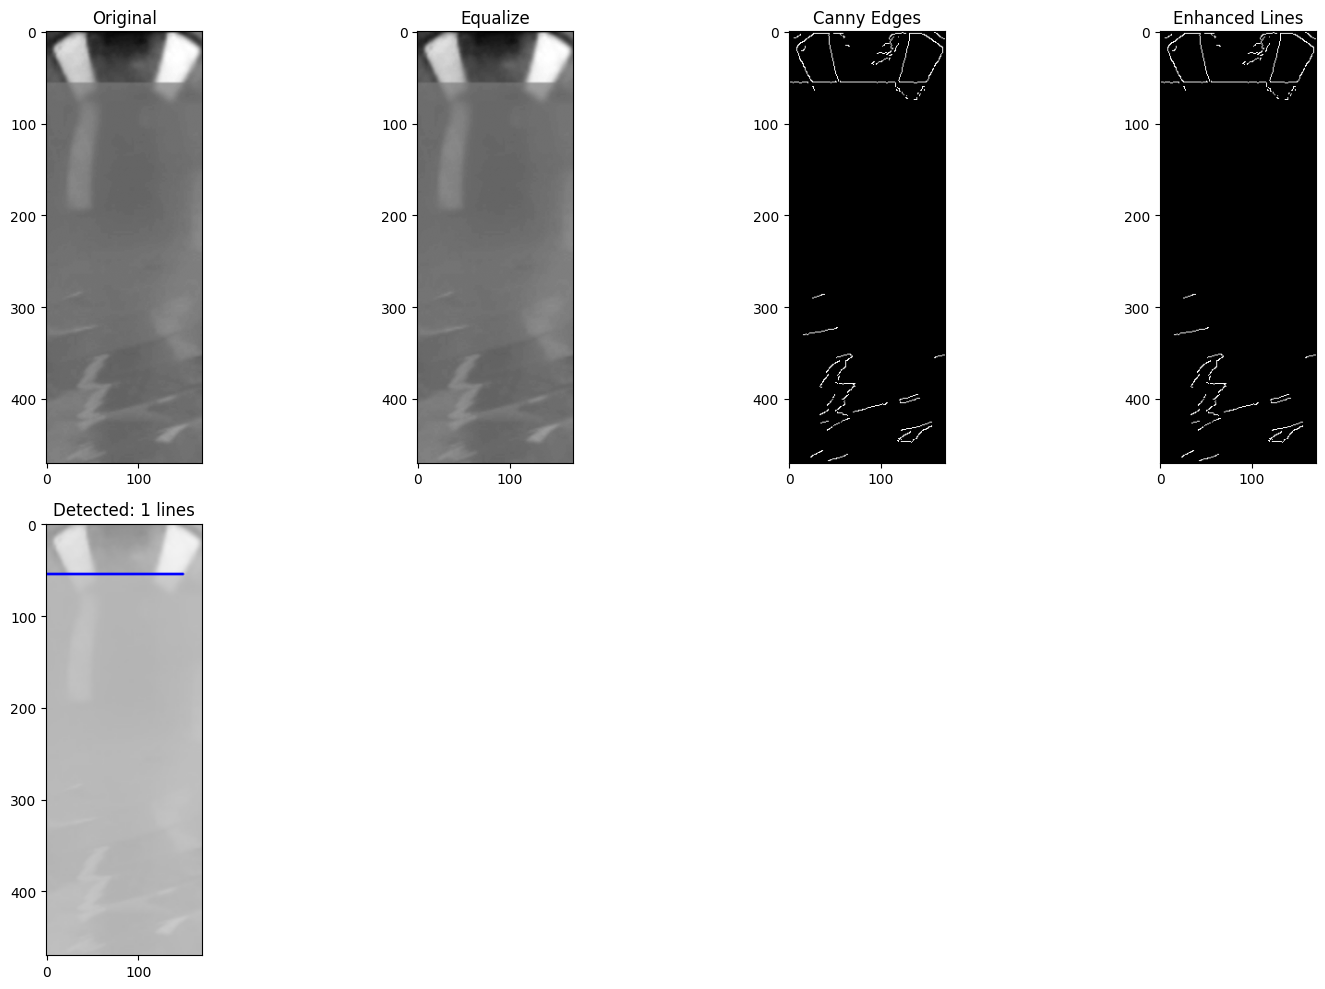

Таймер timer 0.9226799011230469 мс


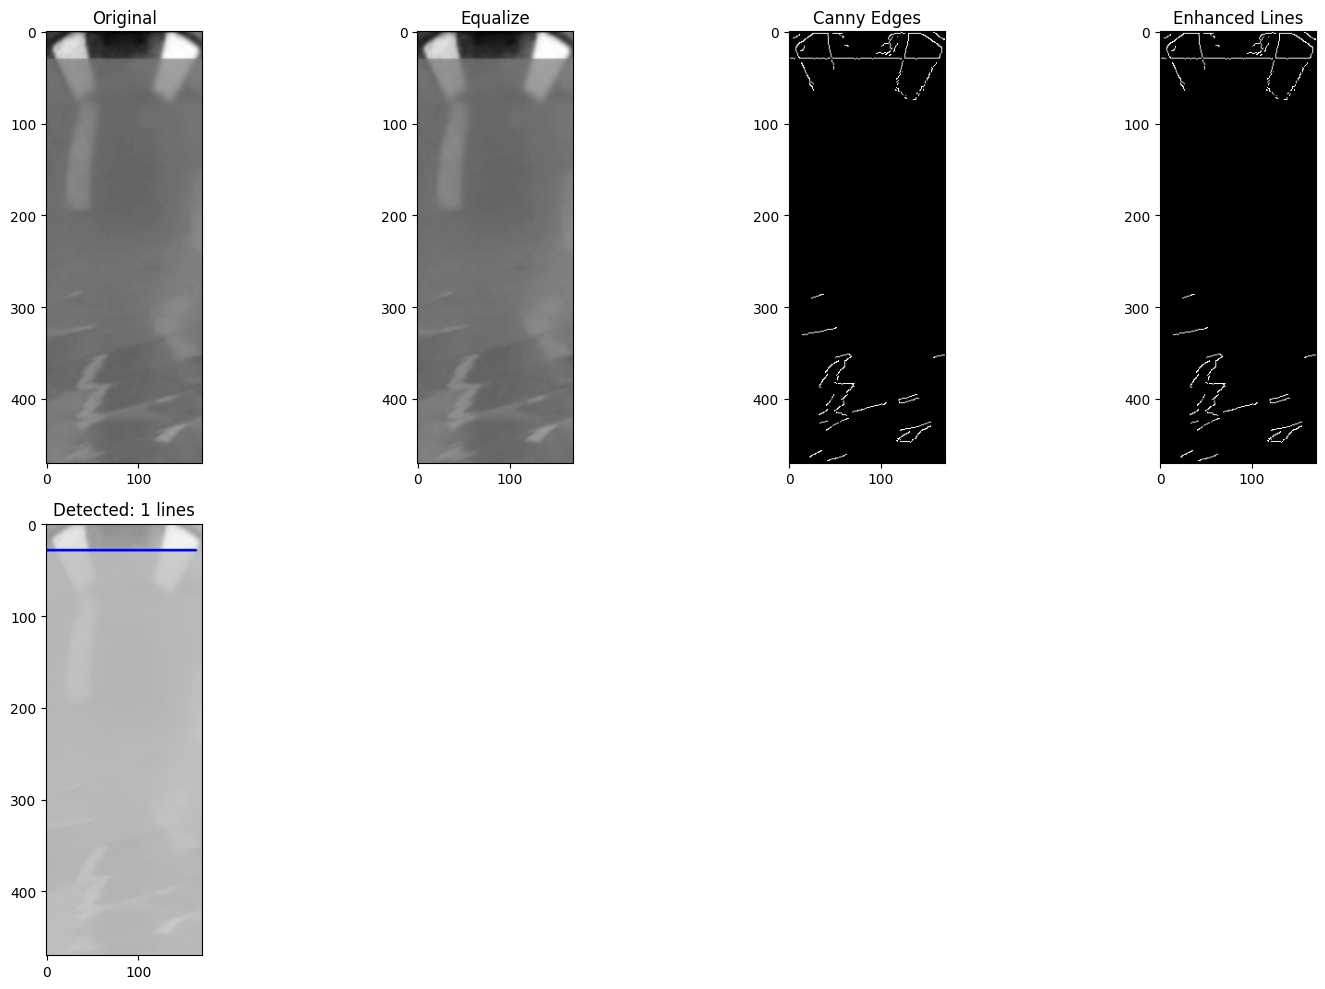

Таймер timer 0.95367431640625 мс


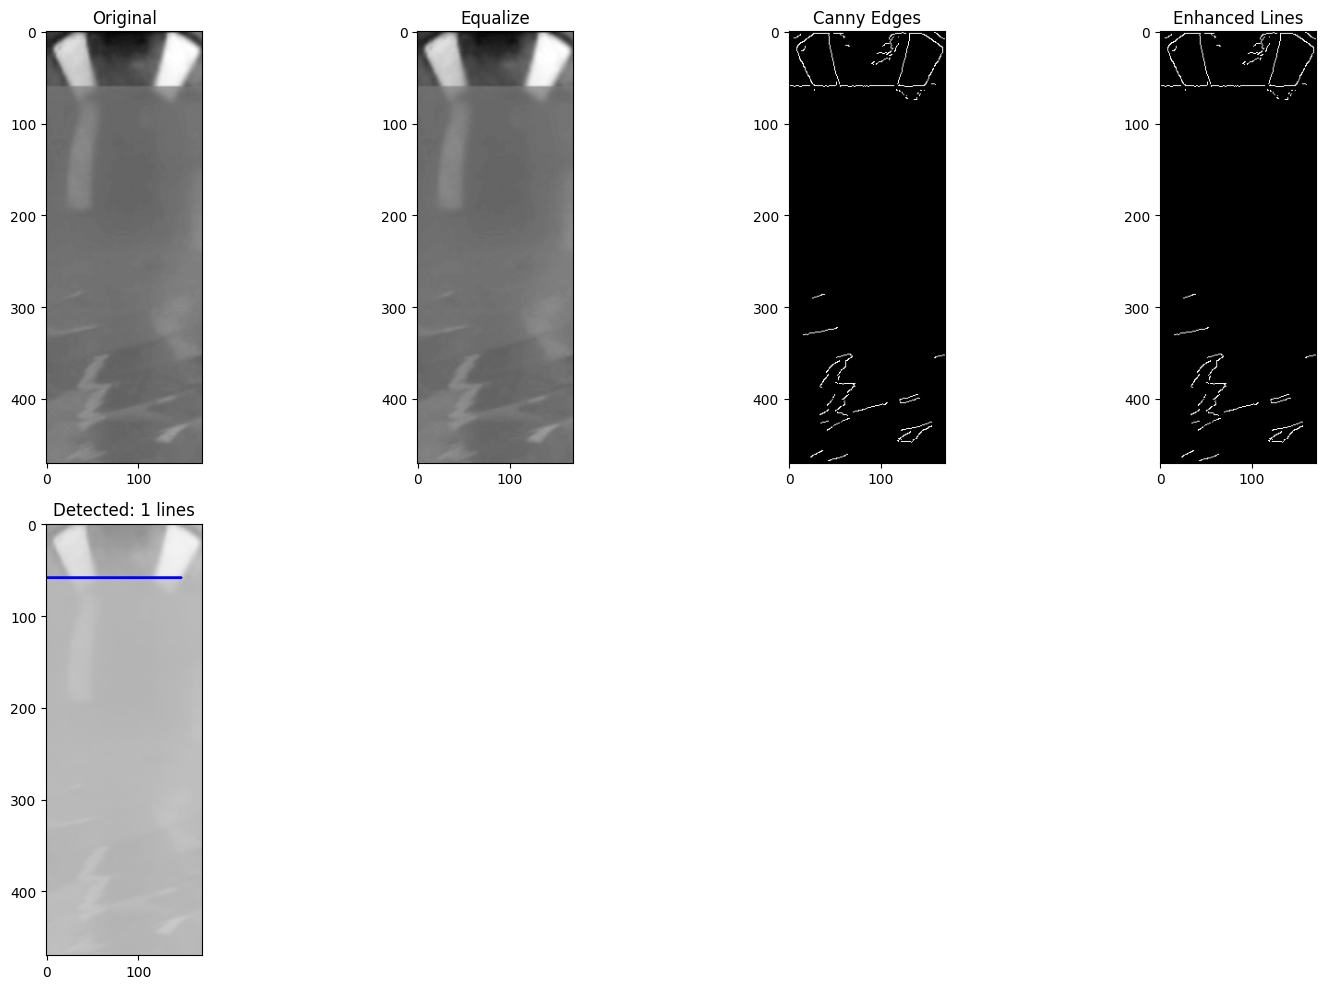

Таймер timer 0.919342041015625 мс


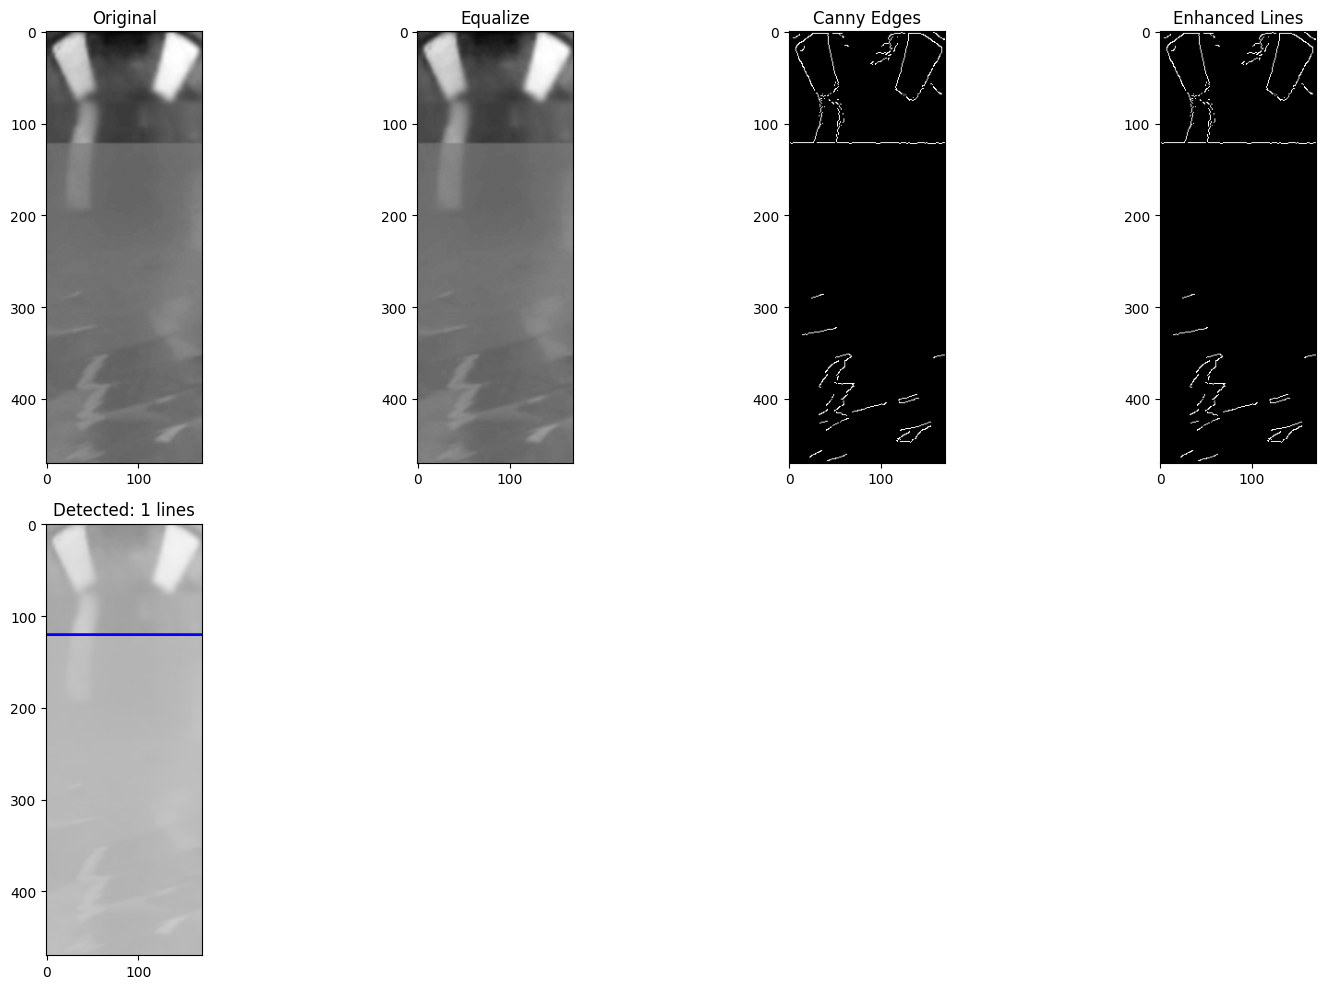

In [30]:
#list_lines_level = []

for crop_bottle in list_crop:
    my_timer = Timer('timer')
    my_timer.start()

    image_crop_level = crop_bottle['level']

    #cv2.imwrite('test.jpg', image_with_rect_2)

    #image_equ = cv2.equalizeHist(image_crop_level)
    image_equ = image_crop_level

    # 2. Гауссово размытие для уменьшения шума
    image_blurred = cv2.GaussianBlur(image_equ, (3, 3), 0)

    # Обнаружение линий с визуализацией этапов
    lines_level, all_images = detect_horizontal_lines(
        image_blurred,
        canny_threshold1=15,
        canny_threshold2=20,
        theta=np.pi/180,
        hough_threshold=50,
        min_line_length=100,
        max_line_gap=50,
        angle_tolerance=3,
        morph_size=0,
    )

    crop_bottle["lines_level"] = lines_level
    #list_lines_level.append(lines_level)

    my_timer.elapsed_time(print_log=True)

    debug = True

    if debug:
        plt.figure(figsize=(15, 10))
        
        plt.subplot(241)
        plt.imshow(image_crop_level, cmap='gray')
        plt.title("Original")
        
        plt.subplot(242)
        plt.imshow(image_equ, cmap='gray')
        plt.title("Equalize")
        
        plt.subplot(243)
        plt.imshow(all_images['edges'], cmap='gray')
        plt.title("Canny Edges")
        
        plt.subplot(244)
        plt.imshow(all_images['enhanced'], cmap='gray')
        plt.title("Enhanced Lines")
        
        plt.subplot(245)
        debug_img = cv2.cvtColor(image_crop_level, cv2.COLOR_GRAY2BGR)
        for line in lines_level:
            x1, y1, x2, y2 = line
            cv2.line(debug_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        plt.imshow(debug_img)
        plt.title(f"Detected: {len(lines_level)} lines")
        
        plt.tight_layout()
        plt.show()


Таймер timer 2.9888153076171875 мс


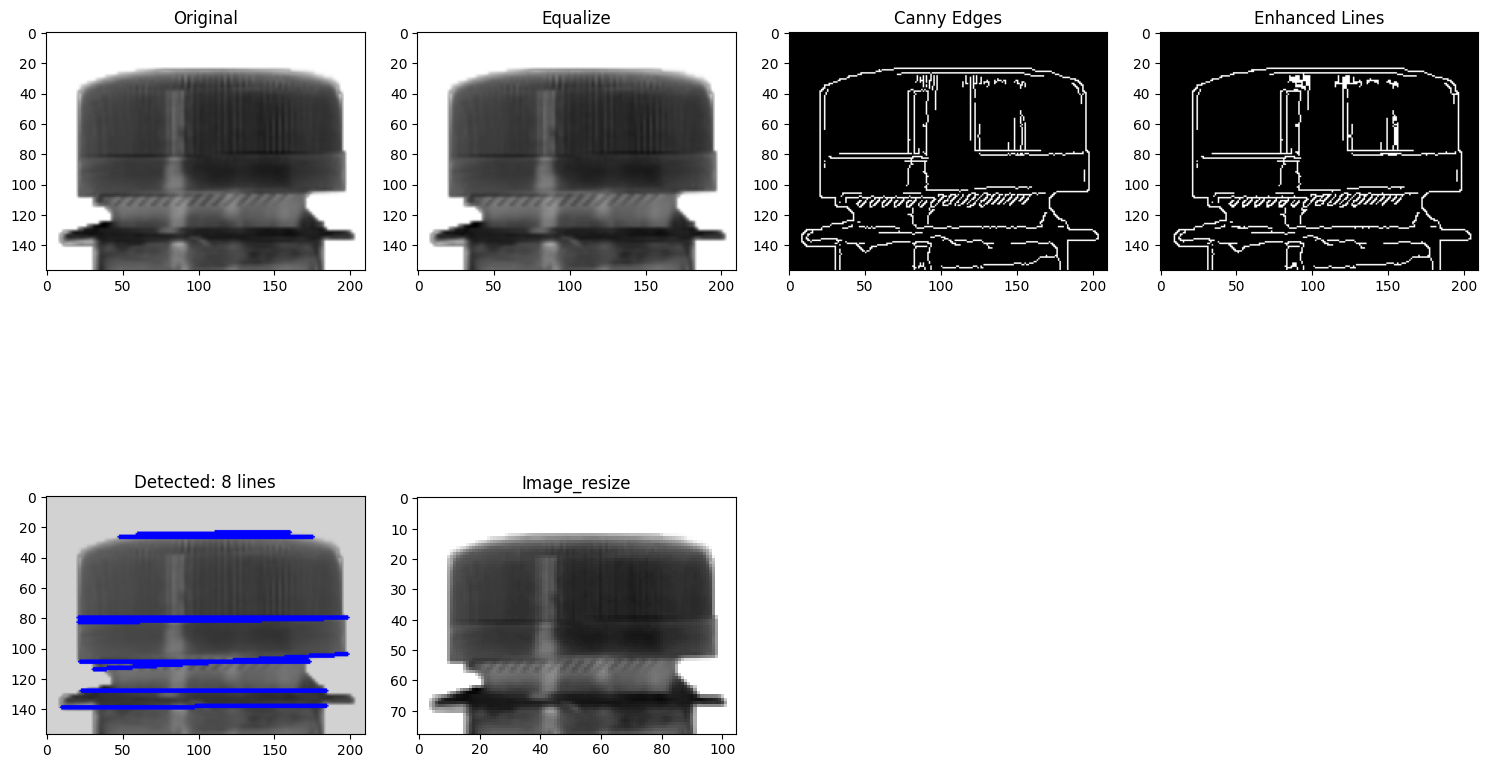

Таймер timer 1.9519329071044922 мс


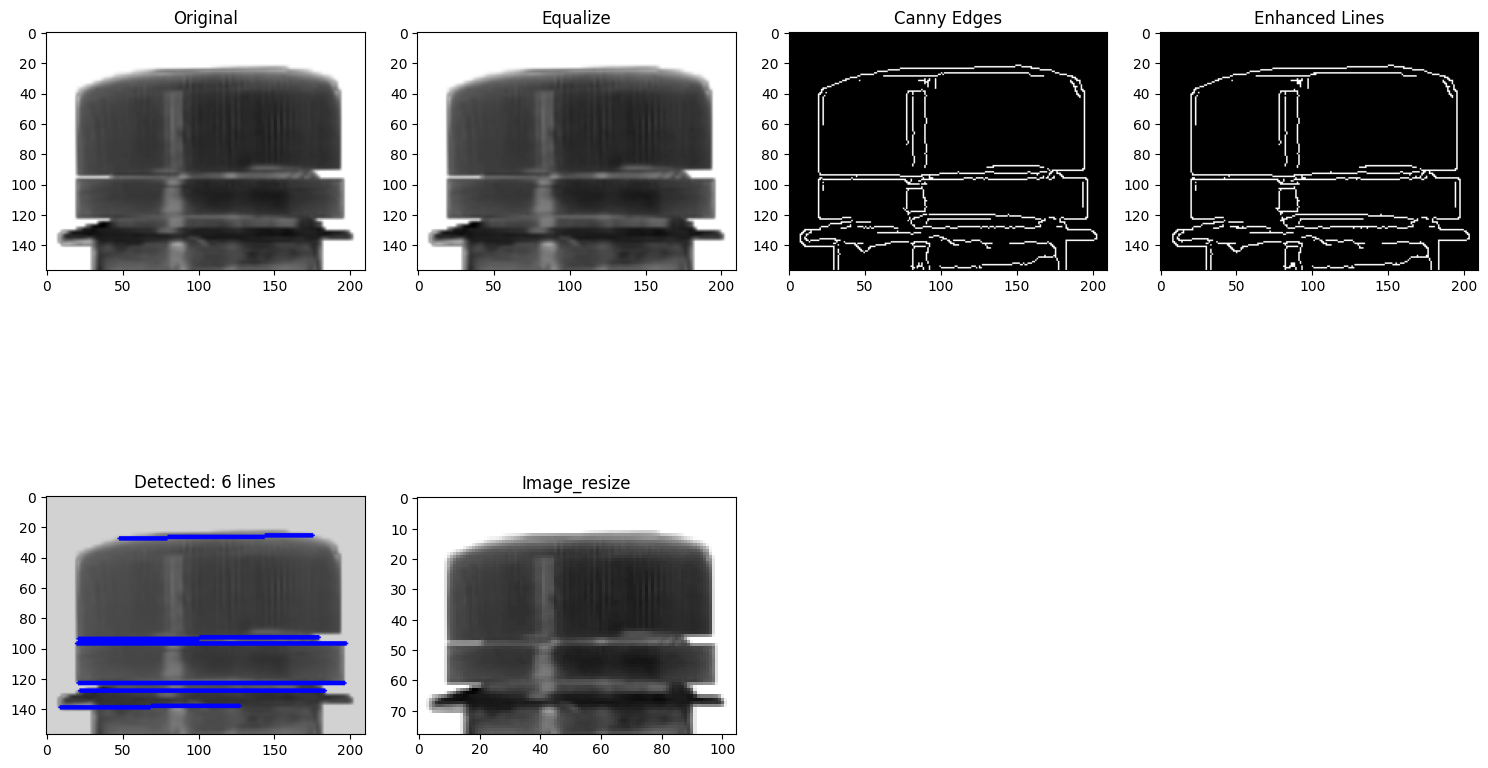

Таймер timer 1.9545555114746094 мс


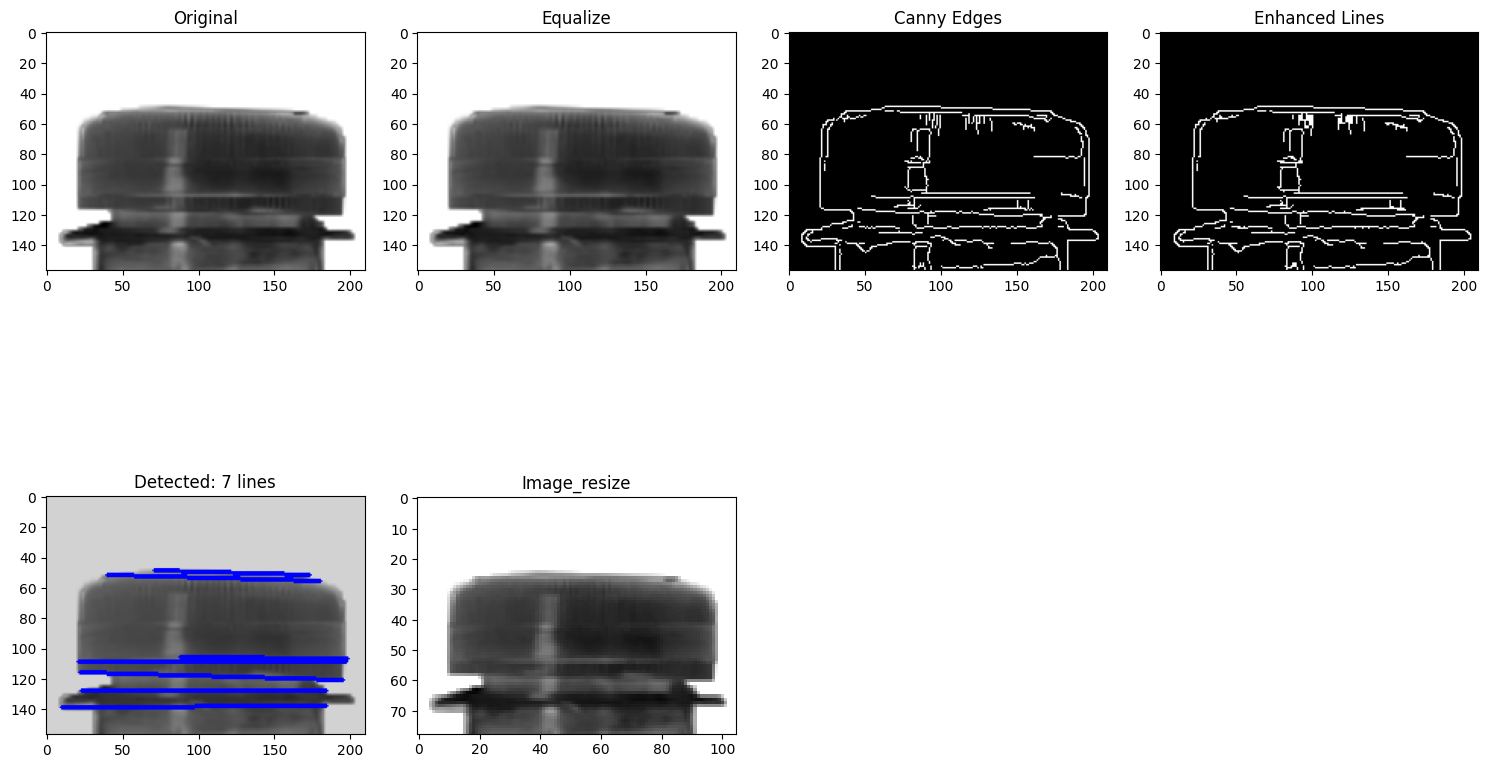

Таймер timer 1.9083023071289062 мс


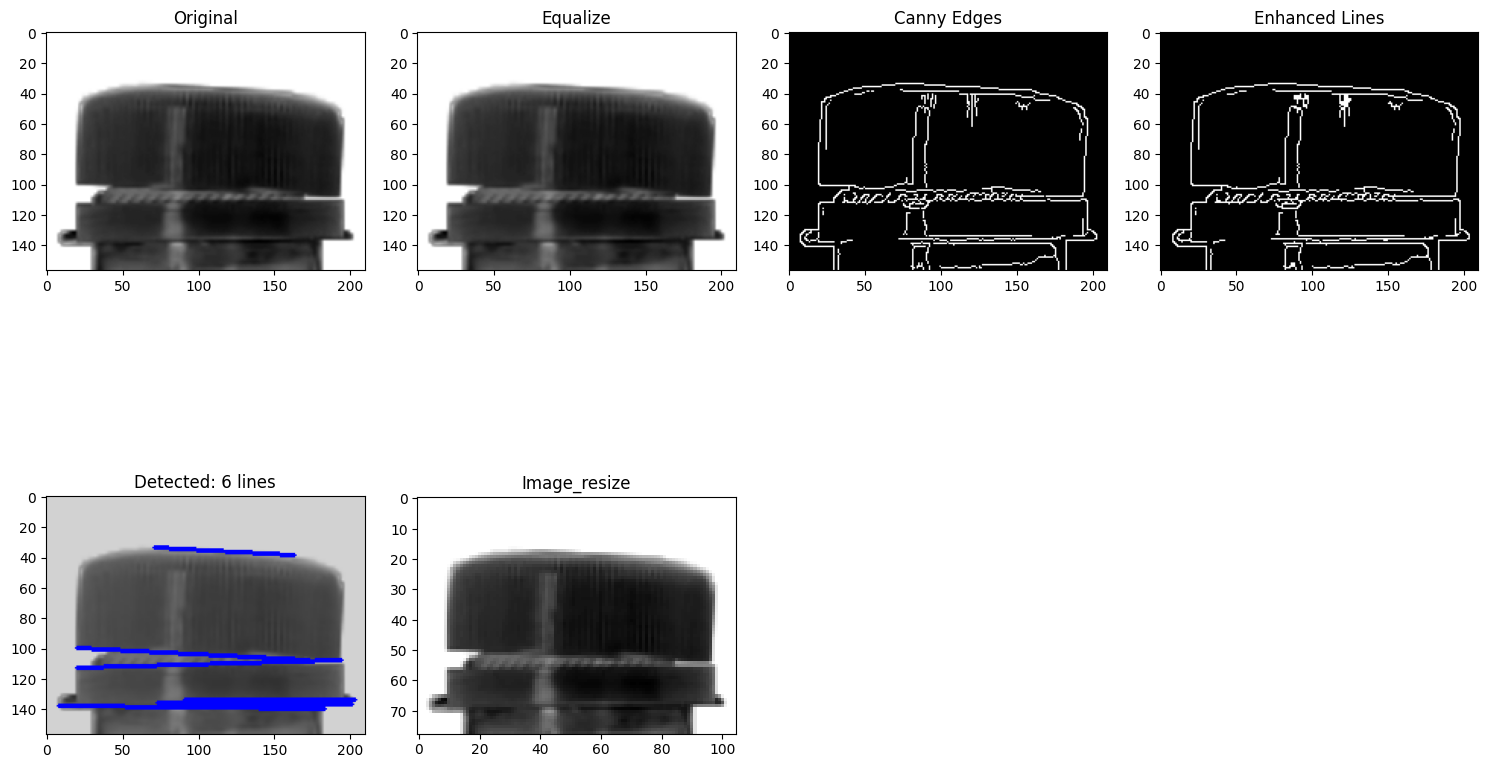

In [31]:
# cv2.imwrite('test_cap.jpg', image_crop_cap)
#list_lines_cap = []

for crop_bottle in list_crop:
    my_timer = Timer('timer')
    my_timer.start()

    image_crop_cap = crop_bottle["cap"]
    #image_equ = cv2.equalizeHist(image_crop_level)
    image_equ = image_crop_cap

    # 2. Гауссово размытие для уменьшения шума
    image_blurred = cv2.GaussianBlur(image_equ, (3, 3), 0)

    # Обнаружение линий с визуализацией этапов
    lines_cap, all_images = detect_horizontal_lines(
        image_crop_cap,
        canny_threshold1=70,
        canny_threshold2=30,
        theta=np.pi/360,
        hough_threshold=70,
        min_line_length=10,
        max_line_gap=50,
        angle_tolerance=30,
        morph_size=2,
    )

    #list_lines_cap.append(lines_cap)
    crop_bottle['lines_cap'] = lines_cap

    my_timer.elapsed_time(print_log=True)

    image_resize = cv2.resize(image_crop_cap, (0,0), fx=0.5, fy=0.5)

    debug = True

    if debug:
        plt.figure(figsize=(15, 10))
        
        plt.subplot(241)
        plt.imshow(image_crop_cap, cmap='gray')
        plt.title("Original")
        
        plt.subplot(242)
        plt.imshow(image_equ, cmap='gray')
        plt.title("Equalize")
        
        plt.subplot(243)
        plt.imshow(all_images['edges'], cmap='gray')
        plt.title("Canny Edges")
        
        plt.subplot(244)
        plt.imshow(all_images['enhanced'], cmap='gray')
        plt.title("Enhanced Lines")
        
        plt.subplot(245)
        debug_img = cv2.cvtColor(image_crop_cap, cv2.COLOR_GRAY2BGR)
        for line in lines_cap:
            x1, y1, x2, y2 = line
            cv2.line(debug_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        plt.imshow(debug_img)
        plt.title(f"Detected: {len(lines_cap)} lines")

        plt.subplot(246)
        plt.imshow(image_resize, cmap='gray')
        plt.title("Image_resize")
        
        plt.tight_layout()
        plt.show()


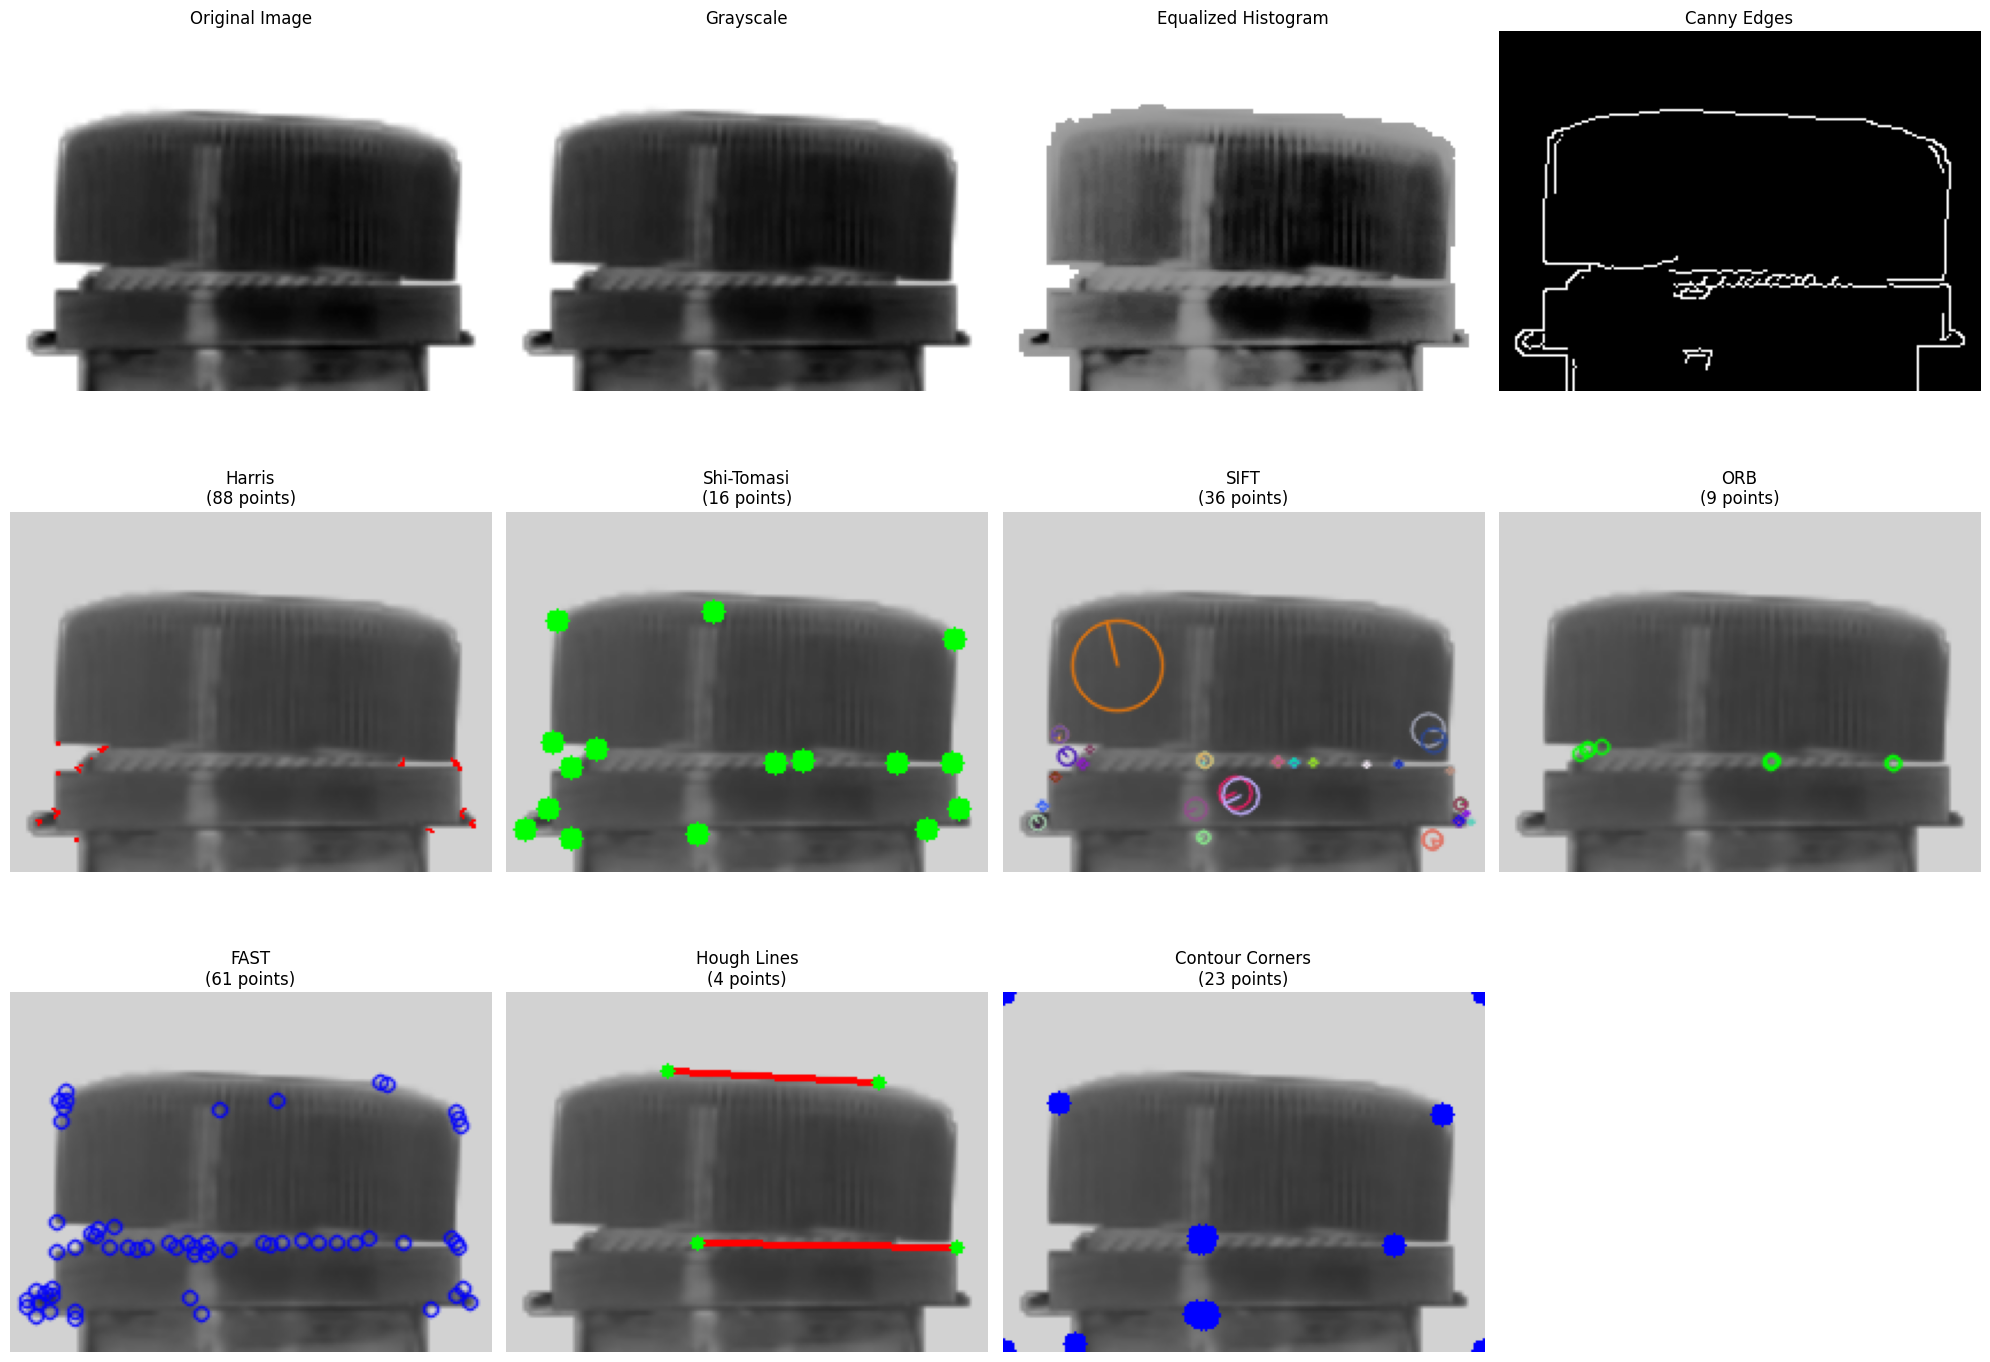

In [32]:
def compare_keypoint_detectors(img, debug=True):
    """
    Сравнение разных методов детекции ключевых точек с построением графиков
    """
    if img is None:
        print("Ошибка: изображение не загружено")
        return None
    
    # Проверяем количество каналов и создаем нужные версии
    if len(img.shape) == 3:
        # Цветное изображение (3 канала)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        color_img = img.copy()
        is_color = True
    else:
        # Уже серое изображение (1 канал)
        gray = img.copy()
        color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        is_color = False
    
    # Предобработка
    image_equ = cv2.equalizeHist(gray)  # Гистограммная эквализация
    edges = cv2.Canny(gray, 50, 150)    # Детектор краев Canny
    
    # Применение разных детекторов
    results = {}
    
    # 1. Harris Corner Detector
    harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    harris_img = color_img.copy()
    
    # Правильное присвоение цветов в зависимости от типа изображения
    if is_color:
        harris_img[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]
    else:
        # Для серого изображения создаем маску и применяем ее
        mask = harris_corners > 0.01 * harris_corners.max()
        harris_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        harris_img[mask] = [0, 0, 255]
    
    results['Harris'] = {
        'image': harris_img,
        'keypoints_count': np.sum(harris_corners > 0.01 * harris_corners.max())
    }
    
    # 2. Shi-Tomasi (Good Features to Track)
    shi_tomasi_points = cv2.goodFeaturesToTrack(gray, 100, 0.05, 10)
    shi_tomasi_img = color_img.copy()
    if shi_tomasi_points is not None:
        for point in shi_tomasi_points:
            x, y = point.ravel()
            cv2.circle(shi_tomasi_img, (int(x), int(y)), 5, (0, 255, 0), -1)
    results['Shi-Tomasi'] = {
        'image': shi_tomasi_img,
        'keypoints_count': len(shi_tomasi_points) if shi_tomasi_points is not None else 0
    }
    
    # 3. SIFT
    sift = cv2.SIFT_create()
    sift_keypoints = sift.detect(gray, None)
    sift_img = cv2.drawKeypoints(color_img, sift_keypoints, None, 
                                flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    results['SIFT'] = {
        'image': sift_img,
        'keypoints_count': len(sift_keypoints)
    }
    
    # 4. ORB
    orb = cv2.ORB_create(nfeatures=500)
    orb_keypoints = orb.detect(gray, None)
    orb_img = cv2.drawKeypoints(color_img, orb_keypoints, None, color=(0, 255, 0))
    results['ORB'] = {
        'image': orb_img,
        'keypoints_count': len(orb_keypoints)
    }
    
    # 5. FAST
    fast = cv2.FastFeatureDetector_create()
    fast_keypoints = fast.detect(gray, None)
    fast_img = cv2.drawKeypoints(color_img, fast_keypoints, None, color=(255, 0, 0))
    results['FAST'] = {
        'image': fast_img,
        'keypoints_count': len(fast_keypoints)
    }
    
    # 6. Canny Edges + Hough Lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)
    hough_img = color_img.copy()
    line_points = 0
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(hough_img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.circle(hough_img, (x1, y1), 3, (0, 255, 0), -1)
            cv2.circle(hough_img, (x2, y2), 3, (0, 255, 0), -1)
            line_points += 2
    results['Hough Lines'] = {
        'image': hough_img,
        'keypoints_count': line_points
    }
    
    # 7. Contour Corners
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_img = color_img.copy()
    contour_points = 0
    for contour in contours:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        for point in approx:
            x, y = point[0]
            cv2.circle(contour_img, (x, y), 5, (255, 0, 0), -1)
            contour_points += 1
    results['Contour Corners'] = {
        'image': contour_img,
        'keypoints_count': contour_points
    }
    
    # Построение графиков если debug=True
    if debug:
        plt.figure(figsize=(20, 15))
        
        # Исходное изображение и предобработка
        plt.subplot(3, 4, 1)
        if is_color:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(img, cmap='gray')
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(3, 4, 2)
        plt.imshow(gray, cmap='gray')
        plt.title("Grayscale")
        plt.axis('off')
        
        plt.subplot(3, 4, 3)
        plt.imshow(image_equ, cmap='gray')
        plt.title("Equalized Histogram")
        plt.axis('off')
        
        plt.subplot(3, 4, 4)
        plt.imshow(edges, cmap='gray')
        plt.title("Canny Edges")
        plt.axis('off')
        
        # Результаты детекторов
        methods = list(results.keys())
        for i, method in enumerate(methods, 5):
            plt.subplot(3, 4, i)
            result_img = results[method]['image']
            if len(result_img.shape) == 3:
                result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
            plt.imshow(result_img)
            plt.title(f"{method}\n({results[method]['keypoints_count']} points)")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # # Дополнительный график: сравнение количества ключевых точек
        # plt.figure(figsize=(12, 6))
        # methods = list(results.keys())
        # counts = [results[method]['keypoints_count'] for method in methods]
        
        # plt.subplot(1, 2, 1)
        # bars = plt.bar(methods, counts, color=['skyblue', 'lightgreen', 'lightcoral', 
        #                                      'gold', 'lightpink', 'lightblue', 'wheat'])
        # plt.title('Количество обнаруженных ключевых точек')
        # plt.xticks(rotation=45, ha='right')
        # plt.ylabel('Количество точек')
        
        # # Добавление значений на столбцы
        # for bar, count in zip(bars, counts):
        #     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
        #             str(count), ha='center', va='bottom')
        
        # plt.subplot(1, 2, 2)
        # # Круговая диаграмма
        # plt.pie(counts, labels=methods, autopct='%1.1f%%', startangle=90)
        # plt.title('Распределение ключевых точек по методам')
        
        # plt.tight_layout()
        # plt.show()
    
    return results

# Использование функции
if __name__ == "__main__":
    results = compare_keypoint_detectors(image_crop_cap, debug=True)
    
    # Вывод статистики
    # if results:
    #     print("\nСтатистика обнаружения ключевых точек:")
    #     print("-" * 50)
    #     for method, data in results.items():
    #         print(f"{method:20}: {data['keypoints_count']:4} точек")

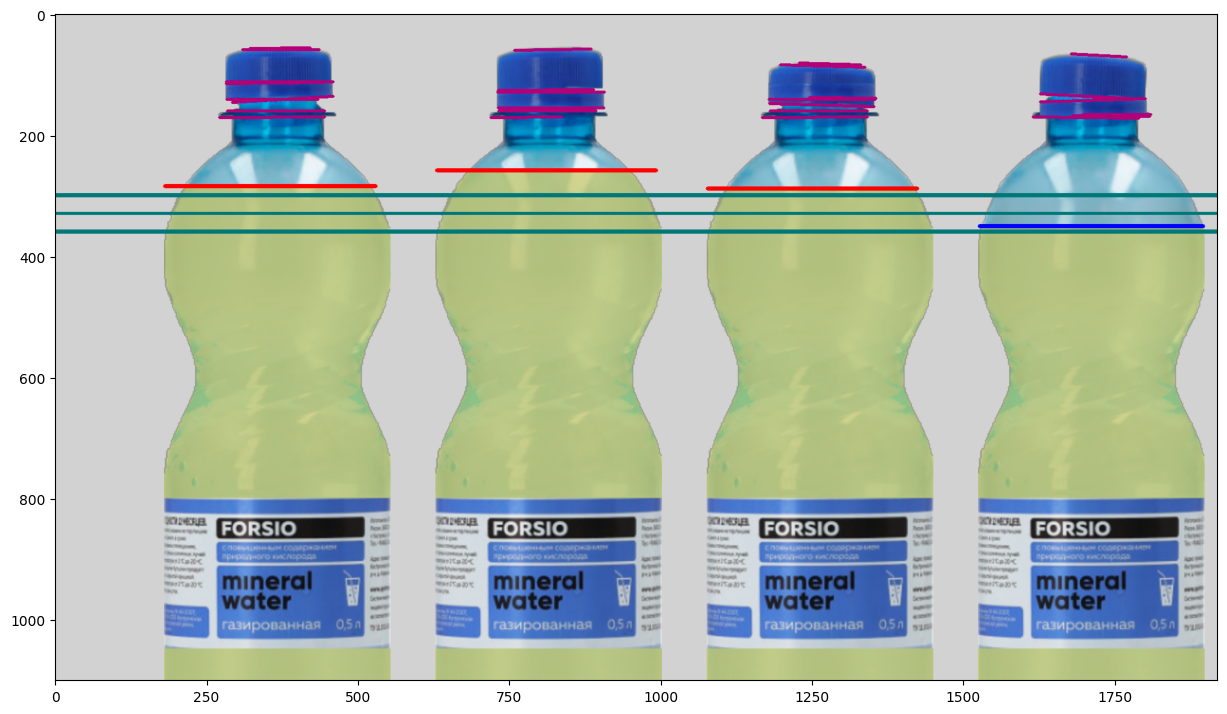

In [33]:

result = frame.copy()

level_max = 300
level_normal = 330
level_min = 360

cv2.line(result, (0, level_max), (result.shape[1], level_max), (120, 120, 0), 6) 
cv2.line(result, (0, level_normal), (result.shape[1], level_normal), (120, 120, 0), 3)  
cv2.line(result, (0, level_min), (result.shape[1], level_min), (120, 120, 0), 6) 


for crop_bottle in list_crop:
    lines_cap = crop_bottle["lines_cap"]
    cap_pos = crop_bottle["cap_pos"]
    
    lines_level = crop_bottle["lines_level"]
    level_pos = crop_bottle["level_pos"]

    for line in lines_cap:
        x1, y1, x2, y2 = line
        x1 = x1 + cap_pos[0]
        y1 = y1 + cap_pos[1]
        x2 = x2 + cap_pos[0]
        y2 = y2 + cap_pos[1]

        cv2.line(result, (x1, y1), (x2, y2), (120, 0, 180), 3) 

    if len(lines_level) > 0:
        lines_level.sort(key=lambda line: line[1]) 

        top_line = lines_level[0]
        x1, y1, x2, y2 = top_line

        # Корректируем координаты
        x1 = x1 + level_pos[0] - 100
        y1 = y1 + level_pos[1]
        x2 = x2 + level_pos[0] + 100
        y2 = y2 + level_pos[1]

        y_middle = (y1+y2) / 2

        if y_middle > level_min or y_middle < level_max:
            color = (0, 0, 255)
        else:
            color = (255, 0, 0)
        
        cv2.line(result, (x1, y1), (x2, y2), color, 6)  # Синий в BGR

# Конвертируем обратно в RGB для matplotlib
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.imshow(result_rgb)
plt.show()